# Imports

In [3]:
import sys
import os
import random
import itertools
import h5py

import sklearn.manifold as manifold
import sklearn.cluster as cluster

import numpy as np
import pandas as pd
from PIL import Image

import plotly.offline as plotly
import plotly.graph_objs as go
plotly.init_notebook_mode(connected=True)

sys.path.insert(0,'..')
from earth.utils import generateFilePathStr

# Basic Functions

In [5]:
def display_image(scene):
    image = Image.open(generateFilePathStr(scene, 'preproc', 'visible'))
    imshow(np.asarray(image))


def get_dataset(images, n, h5F):
    grid_size = 16
    bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B9', 'BQA']
    scene_list = []
    x_list = []
    y_list = []
    dataset = np.empty((
        len(images) * n,
        len(bands) * grid_size ** 2
    ))

    j = 0
    for sceneid in images:
        for _ in range(n):
            subimage = np.array(0)
            while (subimage == 0).any():
                dim = h5F[sceneid][bands[0]].shape
                subimage = np.empty((len(bands), grid_size, grid_size))
                x = random.randint(grid_size / 2, dim[0] - grid_size / 2 - 1)
                y = random.randint(grid_size / 2, dim[1] - grid_size / 2 - 1)

                for i, b in enumerate(bands):
                    subimage[i] = h5F[sceneid][b][
                        x - grid_size / 2 : x + grid_size / 2,
                        y - grid_size / 2 : y + grid_size / 2
                    ]

            dataset[j] = subimage.flatten()
            scene_list.append(sceneid)
            x_list.append(x)
            y_list.append(y)
            j += 1
        
    reference_df = pd.DataFrame({
        'sceneid': scene_list,
        'x': x_list,
        'y': y_list
    })
    
    return dataset, reference_df

# Generating Dataset

# Exploration

In [5]:
tsne = manifold.TSNE(learning_rate=1000)
km = cluster.KMeans(2)

## LC80140312016209LGN00

In [27]:
with h5py.File(generateFilePathStr(kind = 'database'), 'r') as h5F:
    dataset, reference_df = get_dataset(['LC81880242016116LGN00'], 50000, h5F)

Generating sample for LC81880242016116LGN00


In [7]:
cluster_labels = km.fit_predict(dataset[reference_df[reference_df['sceneid'] == 'LC81880242016116LGN00'].index])

In [24]:
group1 = reference_df[reference_df['sceneid'] == 'LC81880242016116LGN00'][cluster_labels==0][['x', 'y']].values
group2 = reference_df[reference_df['sceneid'] == 'LC81880242016116LGN00'][cluster_labels==1][['x', 'y']].values
image = np.array(Image.open(generateFilePathStr('LC81880242016116LGN00', 'preproc', 'visible')))

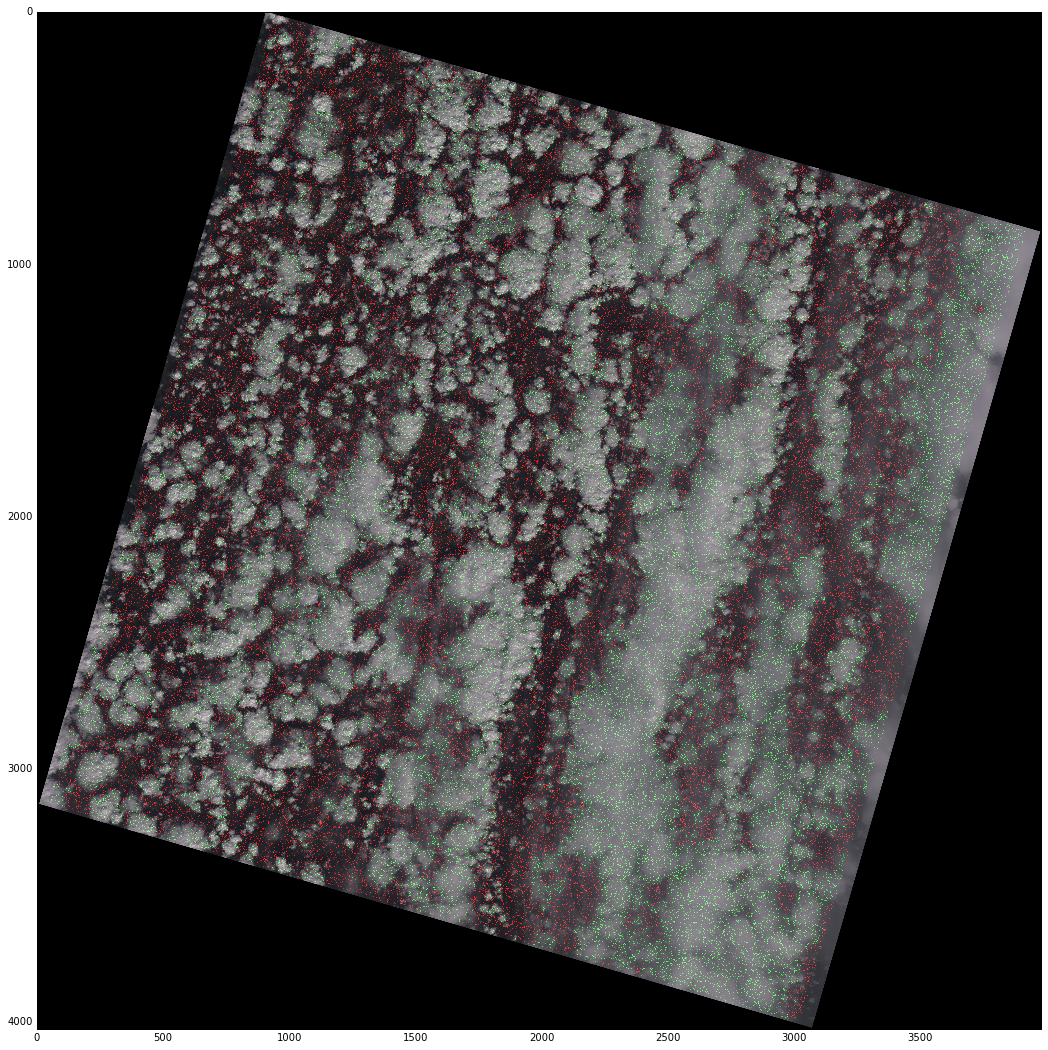

In [25]:
for i in range(group1.shape[0]):
    x = group1[i,0]
    y = group1[i, 1]
    image[x-1:x+2, y-1:y+2, 0] = 255
for i in range(group2.shape[0]):
    x = group2[i,0]
    y = group2[i, 1]
    image[x-1:x+2, y-1:y+2, 1] = 255
imshow(np.asarray(image))

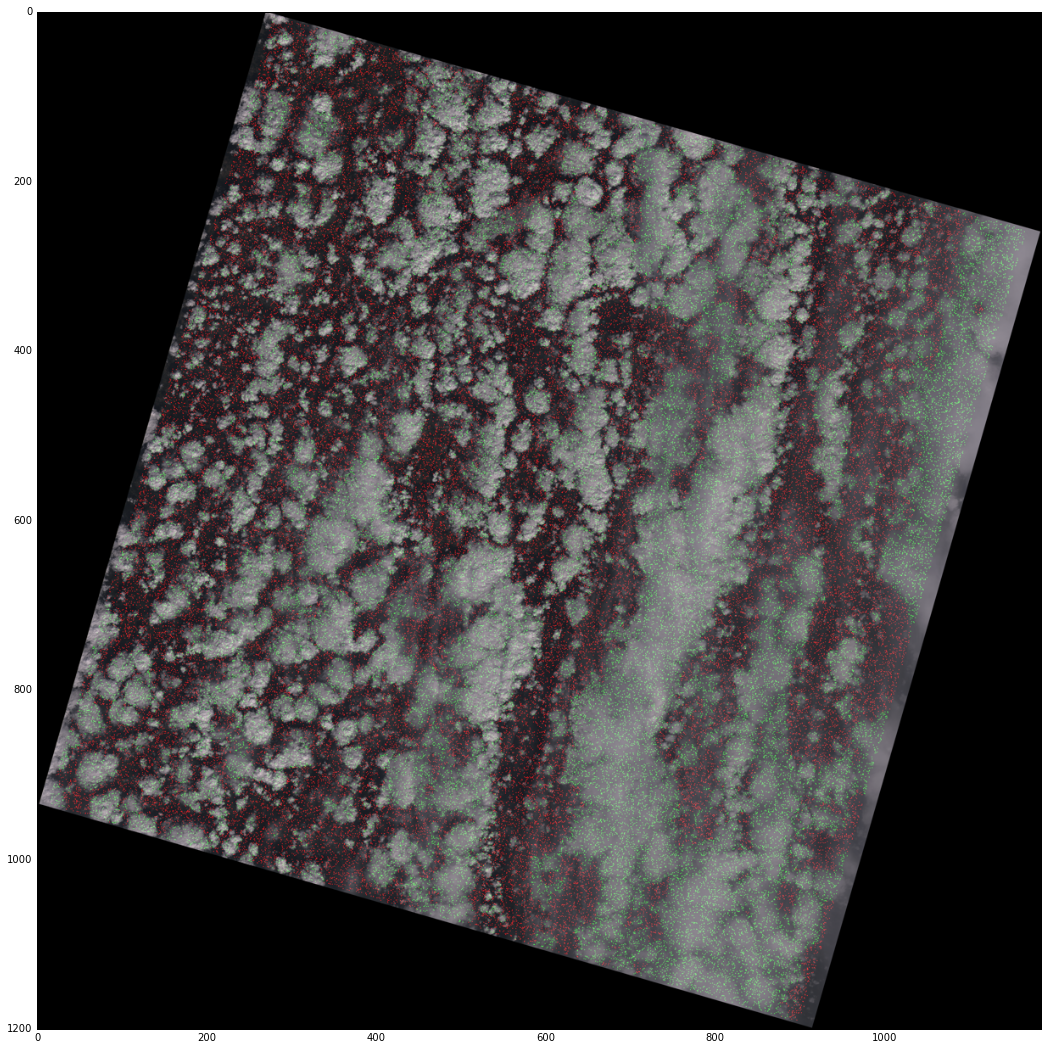

In [26]:
image = Image.fromarray(image)
image.thumbnail((1200, 1200))
imshow(np.asarray(image))

In [69]:
reference_df['label'] = 0

In [73]:
np.isin(cluster_labels, [])

array([False, False, False, ..., False, False, False], dtype=bool)

In [54]:
reference_df = reference_df.rename({'sceneid': 'lid', 'x': 'x_coord', 'y': 'y_coord'})
reference_df[:10]

lid  x_coord  y_coord
0  LC82280982015153LGN00     1923     2875
1  LC82280982015153LGN00     2363     2056
2  LC82280982015153LGN00     1720     1875
3  LC82280982015153LGN00     2604     2171
4  LC82280982015153LGN00      252     1525
5  LC82280982015153LGN00     2761      230
6  LC82280982015153LGN00     1327      765
7  LC82280982015153LGN00     1391     1643
8  LC82280982015153LGN00      749      739
9  LC82280982015153LGN00     1170     1336

In [61]:
reference_df.to_sql('cloud_detection_kmeans2', conn, if_exists='replace', index=False)

In [95]:
reference_df['label'] = 1

In [83]:
cluster_labels

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

In [96]:
reference_df

sceneid     x     y  label
0     LC81880242016116LGN00  1428  2958      1
1     LC81880242016116LGN00  1581  1937      1
2     LC81880242016116LGN00   281  1553      1
3     LC81880242016116LGN00  2806  1564      1
4     LC81880242016116LGN00  1829   583      1
5     LC81880242016116LGN00   949   792      1
6     LC81880242016116LGN00  2974  2103      1
7     LC81880242016116LGN00  1635  2680      1
8     LC81880242016116LGN00   828  1548      1
9     LC81880242016116LGN00  1732  2690      1
10    LC81880242016116LGN00  1218  3462      1
11    LC81880242016116LGN00  3198   544      1
12    LC81880242016116LGN00  1481  1466      1
13    LC81880242016116LGN00  1675   789      1
14    LC81880242016116LGN00   514  1827      1
15    LC81880242016116LGN00   587  2852      1
16    LC81880242016116LGN00  1119  1630      1
17    LC81880242016116LGN00   833  3696      1
18    LC81880242016116LGN00  2241  2586      1
19    LC81880242016116LGN00  2935  1585      1
20    LC81880242016116LGN00  2071  1585      1
21    LC81880242016116LGN00  3492  2097      1
22    LC81880242016116LGN00  2100  3245      1
23    LC81880242016116LGN00  2469  3169      1
24    LC81880242016116LGN00  2183   989      1
25    LC81880242016116LGN00  2108   603      1
26    LC81880242016116LGN00   158  1354      1
27    LC81880242016116LGN00  2649  1092      1
28    LC81880242016116LGN00  1103  2611      1
29    LC81880242016116LGN00  1466  1396      1
...                     ...   ...   ...    ...
9970  LC81880242016116LGN00   948  1577      1
9971  LC81880242016116LGN00  2011  2059      1
9972  LC81880242016116LGN00   878  3754      1
9973  LC81880242016116LGN00  1307  1616      1
9974  LC81880242016116LGN00   577  2310      1
9975  LC81880242016116LGN00  1913  2937      1
9976  LC81880242016116LGN00  1128  3198      1
9977  LC81880242016116LGN00  2470   871      1
9978  LC81880242016116LGN00  3590  2333      1
9979  LC81880242016116LGN00   806  1895      1
9980  LC81880242016116LGN00  3554  1613      1
9981  LC81880242016116LGN00  2742  1766      1
9982  LC81880242016116LGN00   218  1437      1
9983  LC81880242016116LGN00  2217   795      1
9984  LC81880242016116LGN00  3123  2218      1
9985  LC81880242016116LGN00   882  1596      1
9986  LC81880242016116LGN00  1583   907      1
9987  LC81880242016116LGN00   289  1195      1
9988  LC81880242016116LGN00  3092  2246      1
9989  LC81880242016116LGN00  1886  3080      1
9990  LC81880242016116LGN00  3200   502      1
9991  LC81880242016116LGN00   936  1801      1
9992  LC81880242016116LGN00  1431  2368      1
9993  LC81880242016116LGN00  2848  1930      1
9994  LC81880242016116LGN00  1161  1181      1
9995  LC81880242016116LGN00  1855  1112      1
9996  LC81880242016116LGN00  3180  1676      1
9997  LC81880242016116LGN00  1399  1028      1
9998  LC81880242016116LGN00  1138  1936      1
9999  LC81880242016116LGN00   949  2329      1

[10000 rows x 4 columns]

In [97]:
reference_df['label'].loc[np.isin(cluster_labels, [0])] = 0

In [98]:
reference_df

sceneid     x     y  label
0     LC81880242016116LGN00  1428  2958      0
1     LC81880242016116LGN00  1581  1937      1
2     LC81880242016116LGN00   281  1553      1
3     LC81880242016116LGN00  2806  1564      0
4     LC81880242016116LGN00  1829   583      0
5     LC81880242016116LGN00   949   792      0
6     LC81880242016116LGN00  2974  2103      0
7     LC81880242016116LGN00  1635  2680      0
8     LC81880242016116LGN00   828  1548      0
9     LC81880242016116LGN00  1732  2690      0
10    LC81880242016116LGN00  1218  3462      1
11    LC81880242016116LGN00  3198   544      1
12    LC81880242016116LGN00  1481  1466      1
13    LC81880242016116LGN00  1675   789      1
14    LC81880242016116LGN00   514  1827      0
15    LC81880242016116LGN00   587  2852      1
16    LC81880242016116LGN00  1119  1630      1
17    LC81880242016116LGN00   833  3696      1
18    LC81880242016116LGN00  2241  2586      0
19    LC81880242016116LGN00  2935  1585      0
20    LC81880242016116LGN00  2071  1585      1
21    LC81880242016116LGN00  3492  2097      1
22    LC81880242016116LGN00  2100  3245      0
23    LC81880242016116LGN00  2469  3169      1
24    LC81880242016116LGN00  2183   989      0
25    LC81880242016116LGN00  2108   603      0
26    LC81880242016116LGN00   158  1354      1
27    LC81880242016116LGN00  2649  1092      1
28    LC81880242016116LGN00  1103  2611      0
29    LC81880242016116LGN00  1466  1396      1
...                     ...   ...   ...    ...
9970  LC81880242016116LGN00   948  1577      0
9971  LC81880242016116LGN00  2011  2059      1
9972  LC81880242016116LGN00   878  3754      0
9973  LC81880242016116LGN00  1307  1616      0
9974  LC81880242016116LGN00   577  2310      0
9975  LC81880242016116LGN00  1913  2937      1
9976  LC81880242016116LGN00  1128  3198      1
9977  LC81880242016116LGN00  2470   871      0
9978  LC81880242016116LGN00  3590  2333      0
9979  LC81880242016116LGN00   806  1895      1
9980  LC81880242016116LGN00  3554  1613      0
9981  LC81880242016116LGN00  2742  1766      0
9982  LC81880242016116LGN00   218  1437      1
9983  LC81880242016116LGN00  2217   795      0
9984  LC81880242016116LGN00  3123  2218      0
9985  LC81880242016116LGN00   882  1596      0
9986  LC81880242016116LGN00  1583   907      0
9987  LC81880242016116LGN00   289  1195      1
9988  LC81880242016116LGN00  3092  2246      0
9989  LC81880242016116LGN00  1886  3080      1
9990  LC81880242016116LGN00  3200   502      1
9991  LC81880242016116LGN00   936  1801      1
9992  LC81880242016116LGN00  1431  2368      1
9993  LC81880242016116LGN00  2848  1930      1
9994  LC81880242016116LGN00  1161  1181      0
9995  LC81880242016116LGN00  1855  1112      0
9996  LC81880242016116LGN00  3180  1676      0
9997  LC81880242016116LGN00  1399  1028      0
9998  LC81880242016116LGN00  1138  1936      0
9999  LC81880242016116LGN00   949  2329      0

[10000 rows x 4 columns]